In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("placement.csv")

In [14]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [16]:
df.shape

(100, 4)

In [17]:
df = df.iloc[:,1:] 

In [18]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


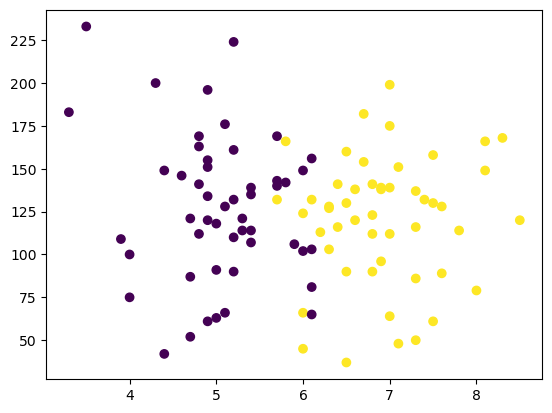

In [23]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])

In [26]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [27]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [28]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.1)

In [33]:
X_train

,cgpa,iq
36,5.7,140.0
68,4.0,75.0
15,5.1,176.0
53,8.3,168.0
83,7.5,130.0
...,...,...
45,6.0,66.0
35,6.8,90.0
31,3.9,109.0
17,3.3,183.0


In [34]:
Y_train

36    0
68    0
15    0
53    1
83    1
     ..
45    1
35    1
31    0
17    0
39    0
Name: placement, Length: 90, dtype: int64

In [35]:
X_test

,cgpa,iq
21,7.1,151.0
42,7.6,89.0
60,6.9,139.0
94,4.7,52.0
59,4.8,112.0
47,5.2,161.0
55,7.8,114.0
62,6.0,102.0
33,6.0,149.0
67,5.0,118.0


In [36]:
Y_test

21    1
42    1
60    1
94    0
59    0
47    0
55    1
62    0
33    0
67    0
Name: placement, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_train

array([[-0.24377775,  0.39173731],
       [-1.73569761, -1.21194588],
       [-0.7703377 ,  1.27993108],
       [ 2.03798202,  1.08255469],
       [ 1.33590209,  0.14501682],
       [-0.50705773, -0.42244031],
       [-1.03361768,  0.41640936],
       [ 0.01950222, -0.00301547],
       [-0.24377775,  0.46575346],
       [-1.73569761, -0.59514465],
       [-0.94585769,  0.66312985],
       [ 0.37054219, -0.20039187],
       [-0.94585769,  0.24370502],
       [ 0.10726221, -0.5211285 ],
       [ 0.28278219, -0.5211285 ],
       [ 0.98486213, -1.87809121],
       [ 1.77470205, -1.11325768],
       [-0.94585769, -0.10170367],
       [ 0.01950222, -1.95210736],
       [ 0.63382216,  1.42796338],
       [-0.59481772, -0.24973596],
       [ 0.72158215, -0.29908006],
       [-1.38465764, -2.0261235 ],
       [-0.85809769, -1.50801047],
       [-0.50705773,  0.36706526],
       [-0.94585769, -1.55735457],
       [ 1.16038211,  0.31772117],
       [-1.12137767, -0.91588129],
       [-1.12137767,

In [42]:
X_test = scaler.transform(X_test)

In [43]:
X_test

array([[ 0.98486213,  0.66312985],
       [ 1.42366208, -0.86653719],
       [ 0.80934214,  0.36706526],
       [-1.12137767, -1.77940301],
       [-1.03361768, -0.29908006],
       [-0.68257771,  0.90985035],
       [ 1.59918207, -0.24973596],
       [ 0.01950222, -0.54580055],
       [ 0.01950222,  0.61378576],
       [-0.85809769, -0.15104777]])

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf =  LogisticRegression()

In [46]:
# Model Training
clf.fit(X_train,Y_train)

LogisticRegression()

In [55]:
clf.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [53]:
Y_pred = clf.predict(X_test)

In [54]:
Y_test

21    1
42    1
60    1
94    0
59    0
47    0
55    1
62    0
33    0
67    0
Name: placement, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(Y_test,Y_pred)

0.8

In [58]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.1 MB/s eta 0:00:00


In [60]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

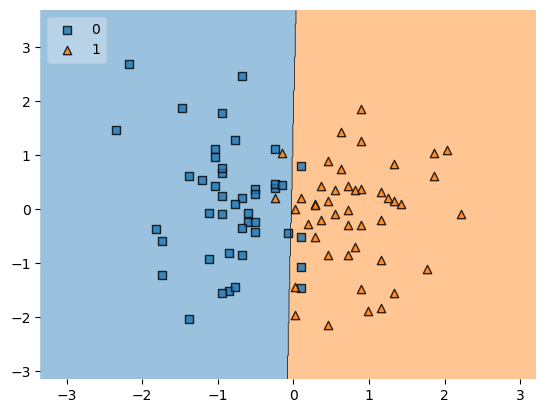

In [62]:
plot_decision_regions(X_train , Y_train.values , clf=clf, legend=2)

In [63]:
import pickle

In [64]:
pickle.dump(clf,open('model.pkl','wb'))